In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime



In [2]:
# For division
from __future__ import division

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,255.119167,249.380596,251.875039,252.487659,3.349145e+07,251.008945
std,43.708837,42.496043,42.953630,43.328845,1.722205e+07,43.783842
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.256134
25%,212.117500,207.317505,209.977501,209.145000,2.184540e+07,207.319828
50%,258.220001,249.270004,251.824997,255.315002,2.834300e+07,253.942772
75%,291.287506,284.092514,285.372490,289.040001,3.841992e+07,288.259697
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,326.316681


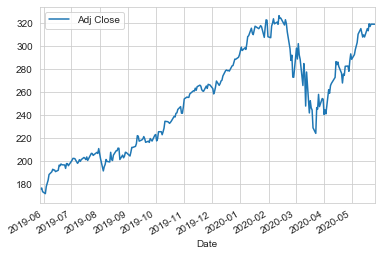

In [5]:
AAPL['Adj Close']. plot(legend= True)

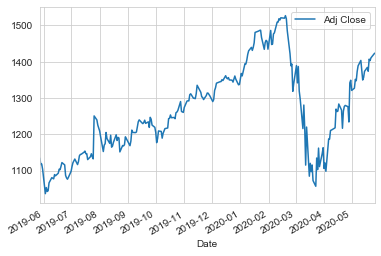

In [24]:
GOOG['Adj Close']. plot(legend= True)

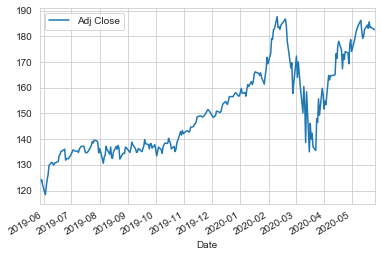

In [25]:
MSFT['Adj Close']. plot(legend= True)

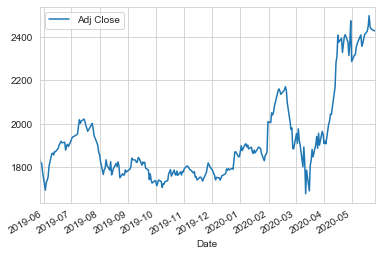

In [26]:
AMZN['Adj Close']. plot(legend= True)

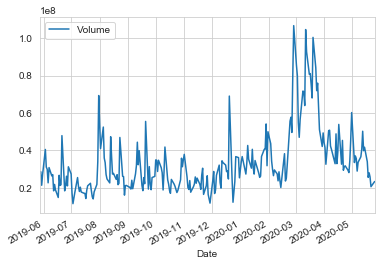

In [6]:
AAPL['Volume']. plot(legend= True)

In [7]:
#To calculate the moving average for Apple stock
ma_day=[10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]= pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

In [8]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2019-05-28,180.589996,177.910004,178.919998,178.229996,27948200.0,176.128006,NaN,NaN,NaN
2019-05-29,179.350006,176.000000,176.419998,177.380005,28481200.0,175.288025,NaN,NaN,NaN
2019-05-30,179.229996,176.669998,177.949997,178.300003,21218400.0,176.197189,NaN,NaN,NaN
2019-05-31,177.990005,174.990005,176.229996,175.070007,27043600.0,173.005280,NaN,NaN,NaN
2019-06-03,177.919998,170.270004,175.600006,173.300003,40396100.0,171.256134,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-19,318.519989,313.010010,315.029999,313.140015,25432400.0,313.140015,309.228839,297.087250,273.965167
2020-05-20,319.519989,316.519989,316.679993,319.230011,27876200.0,319.230011,311.170001,299.281020,274.658373
2020-05-21,320.890015,315.869995,318.660004,316.850006,25672200.0,316.850006,312.563004,301.409145,275.501645


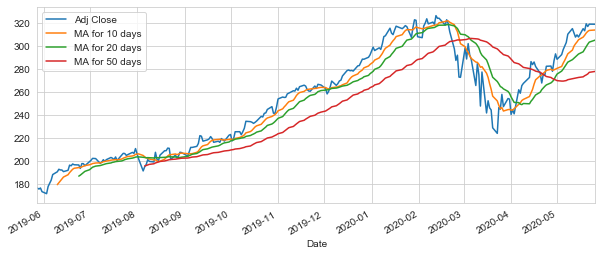

In [9]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

The moving average helps to filter out the noise that comes from random short time price fluctuation.

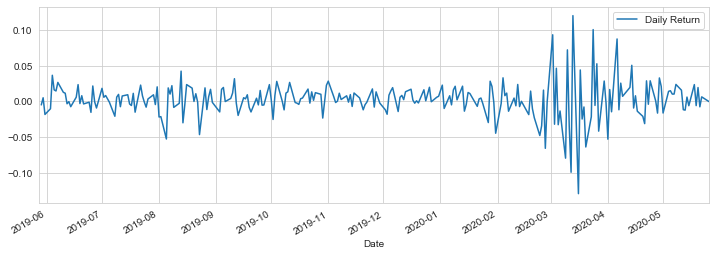

In [10]:
#to calculate the daily return for Apple stock
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,4),legend= True)

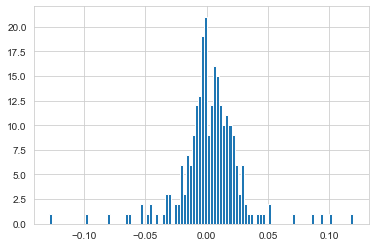

In [11]:
# to find the average daily return
AAPL['Daily Return'].hist(bins=100)


In [12]:
# to analyse the returns of several tech stock
# grab all the closing prices of all the tech stock into a dataframe
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']


In [13]:
closing_df. head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-28,176.128006,1134.150024,124.626442,1836.430054
2019-05-29,175.288025,1116.459961,123.421265,1819.189941
2019-05-30,176.197189,1117.949951,124.201653,1816.319946
2019-05-31,173.005280,1103.630005,122.176575,1775.069946
2019-06-03,171.256134,1036.229980,118.383247,1692.689941


In [14]:
# to calculate the daily return for each stock
tech_rets = closing_df.pct_change() 
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-05-28,NaN,NaN,NaN,NaN
2019-05-29,-0.004769,-0.015598,-0.009670,-0.009388
2019-05-30,0.005187,0.001335,0.006323,-0.001578
2019-05-31,-0.018116,-0.012809,-0.016305,-0.022711
2019-06-03,-0.010110,-0.061071,-0.031048,-0.046409
...,...,...,...,...
2020-05-19,-0.005778,-0.007554,-0.006922,0.009508
2020-05-20,0.019448,0.024198,0.013871,0.019846
2020-05-21,-0.007455,-0.002787,-0.012011,-0.020497


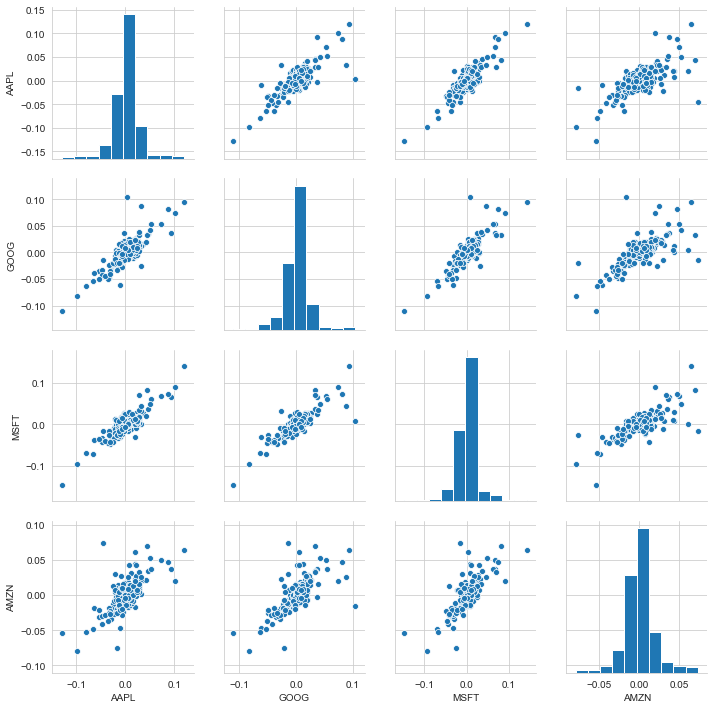

In [15]:
#compare the daily returns of the stock
sns.pairplot(tech_rets.dropna())

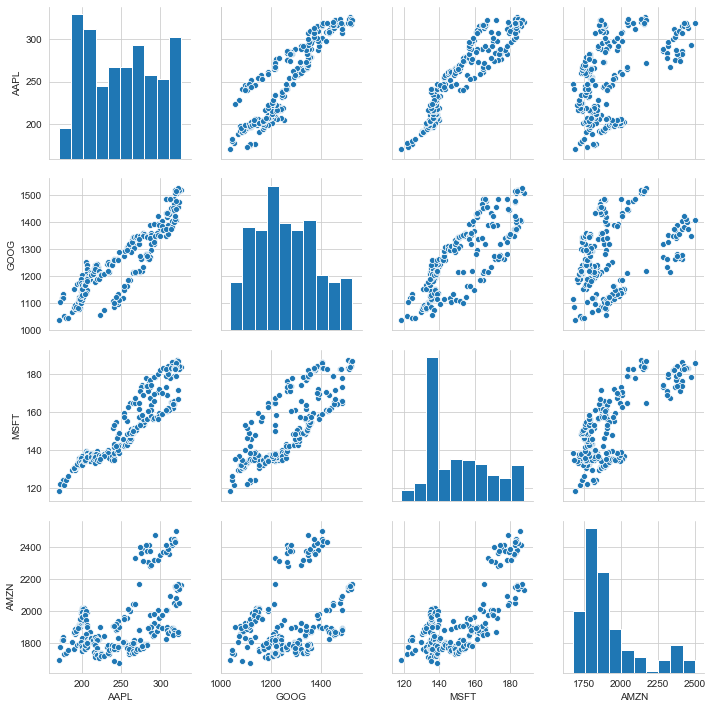

In [16]:
# to find the correlation between the closing cost of the stock
sns.pairplot(closing_df,)

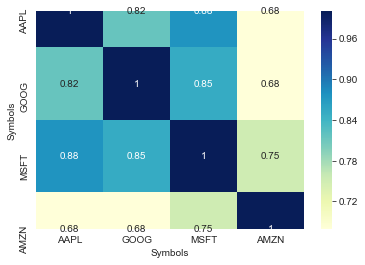

In [17]:
# another method to find the correlation between the daily return of the stock
sns.heatmap(tech_rets.dropna().corr(),annot=True, cmap="YlGnBu")

This shows that all the technology companies are all positively correlated; but microsoft and apple has the strongest correlation of daily stock return

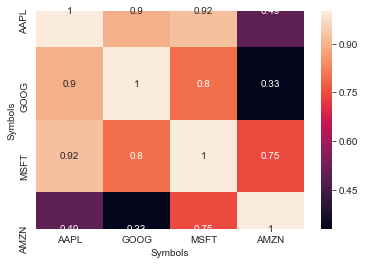

In [29]:
# another method to find the correlation between the closing cost of the stock
sns.heatmap(closing_df.corr(),annot=True)

This also shows that apple and microsoft has the strongest correlation in closing stock

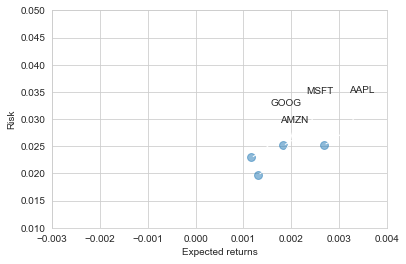

In [30]:
# to compare the expected return with the standard deviation of the daily return
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)


plt.ylim([0.01,0.05])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')


for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [31]:
# to calculate the value as risk for the apple stock using the boostrap method 
rets['AAPL'].quantile(0.05)

-0.03315459757901379

That means that with 95% confidence, our worst daily loss for apple stock will not exceed 3.4%.

In [32]:
# to calculate the value as risk for the amazon stock using the boostrap method 
rets['AMZN'].quantile(0.05)

-0.02766398876796805

That means that with 95% confidence, our worst daily loss  for amazon stock will not exceed 2.8%

In [33]:
# to calculate the value as risk for the google stock using the boostrap method 
rets['GOOG'].quantile(0.05)

-0.034626368578302535

That means that with 95% confidence, our worst daily loss  for google stock will not exceed 3.4%

In [34]:
# to calculate the value as risk for the microsoft stock using the boostrap method 
rets['MSFT'].quantile(0.05)

-0.03306038931415306

That means that with 95% confidence, our worst daily loss will not exceed 3.2%